In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from modules.Utils.utils import DummyLogger
import sqlite3
from tqdm import tqdm
import time
import subprocess
import matplotlib.dates as mdates
from datetime import datetime
from astropy.table import Table
from tqdm.notebook import tqdm_notebook
from modules.quicklook.src.analyze_time_series import AnalyzeTimeSeries
%matplotlib inline

In [2]:
db_path = 'kpf_ts_oct2024_v2.db' # name of database file
myTS = AnalyzeTimeSeries(db_path=db_path)

INFO: Starting AnalyzeTimeSeries
INFO: Jupyter Notebook environment detected.
INFO: Path of database file: /code/KPF-Pipeline/kpf_ts_oct2024_v2.db
INFO: Base data directory: /data/L0
INFO: Primary table 'kpfdb' created/updated successfully.
INFO: Metadata table 'kpfdb_metadata' created/updated successfully.
INFO: Summary: 14928 obs x 1188 cols over 27 days in 20241001-20241027; updated 2025-02-06 18:56:34


In [5]:
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
cursor.execute(
    """
    SELECT keyword, description
    FROM kpfdb_metadata
    WHERE source = "L2 RV Extension"
    ORDER BY keyword;
    """)
rows = cursor.fetchall()
keywords = [f'"{keyword}"' for keyword, description in rows if keyword]

query = f"""SELECT ObsID, OBJECT, [DATE-MID], NOTJUNK, GOODREAD, CCFBCV, CCFBJD, L0_filename,   
    {', '.join(keywords)} 
    FROM kpfdb
    WHERE NOTJUNK = 1.0 AND OBJECT NOT LIKE '%autocal%' AND Source = 'Star'"""
df = pd.read_sql_query(query, conn)
conn.close()
df

,ObsID,OBJECT,DATE-MID,NOTJUNK,GOODREAD,CCFBCV,CCFBJD,L0_filename,BCRV00,BCRV01,...,RVY57,RVY58,RVY59,RVY60,RVY61,RVY62,RVY63,RVY64,RVY65,RVY66
0,KP.20241003.18211.46,TOI-1386,2024-10-03T05:06:01.466,1,None,-0.131280,2.460587e+06,KP.20241003.18211.46.fits,-0.131263143448323,-0.13131158144219,...,0.0,-72.6963217858103,47.0800276600691,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,KP.20241003.17479.33,TOI-1386,2024-10-03T04:53:49.337,1,None,-0.118955,2.460587e+06,KP.20241003.17479.33.fits,-0.118941793158118,-0.118956615465355,...,0.0,14.3595861814842,-45.2680650110629,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,KP.20241003.17827.92,TOI-1386,2024-10-03T04:59:37.931,1,None,-0.124846,2.460587e+06,KP.20241003.17827.92.fits,-0.1247911073227,-0.124791291647548,...,0.0,-77.3812461244719,-66.8489573381284,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,KP.20241003.18560.27,TOI-1386,2024-10-03T05:11:50.282,1,None,-0.137395,2.460587e+06,KP.20241003.18560.27.fits,-0.13736267646374,-0.137361142087524,...,0.0,57.258071912019,-23.5175851789336,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,KP.20241003.18908.70,TOI-1386,2024-10-03T05:17:38.707,1,None,-0.143564,2.460587e+06,KP.20241003.18908.70.fits,-0.14351051553664,-0.14353846890906,...,0.0,46.7299964692225,-11.3128051527031,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,KP.20241026.49181.48,52711,2024-10-26T13:44:04.989,1,None,28.050886,2.460610e+06,KP.20241026.49181.48.fits,28.0508725713154,28.0508761366599,...,0.0,22.7169217062974,-38.2785349674322,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776,KP.20241026.49992.37,HIP37217,2024-10-26T14:04:50.091,1,None,22.411861,2.460610e+06,KP.20241026.49992.37.fits,22.4112307340587,22.4111530764493,...,0.0,-1.92022982588995,65.4683625601405,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,KP.20241026.51667.01,44219,2024-10-26T14:22:18.551,1,None,21.881098,2.460610e+06,KP.20241026.51667.01.fits,21.8810467301081,21.8810168500451,...,0.0,-112.696855858522,15.7976897824488,0.0,0.0,0.0,0.0,0.0,0.0,0.0
778,KP.20241026.52204.35,HAT-P-20,2024-10-26T14:37:01.365,1,None,29.100836,2.460610e+06,KP.20241026.52204.35.fits,29.0989274075178,29.0991451106733,...,0.0,30.9935161416225,0.353441354465979,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
BCRV0 = df[df['BCRV00'].notnull()].copy()
BCRV1 = df[df['BCRV01'].notnull()].copy()
BCRV2 = df[df['BCRV02'].notnull()].copy()
BCRV3 = df[df['BCRV03'].notnull()].copy()
BCRV0.loc[:, 'BCRV00'] = BCRV0['BCRV00'].astype(float) * 1000
BCRV1.loc[:, 'BCRV01'] = BCRV1['BCRV01'].astype(float) * 1000
BCRV2.loc[:, 'BCRV02'] = BCRV2['BCRV02'].astype(float) * 1000
BCRV3.loc[:, 'BCRV03'] = BCRV3['BCRV03'].astype(float) * 1000

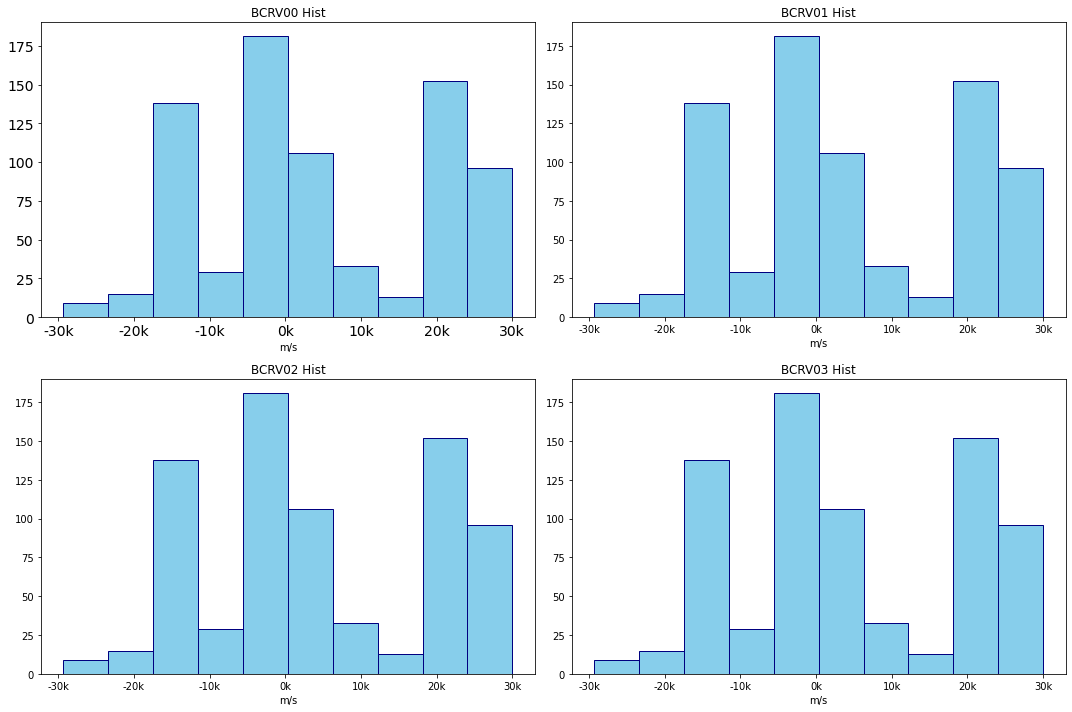

In [7]:
import matplotlib.ticker as ticker
def format_thousands(value, tick_number):
    return f'{int(value / 1000)}k'

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0][0].hist(BCRV0['BCRV00'], bins=10, color='skyblue', edgecolor='navy')
axes[0][0].set_title('BCRV00 Hist')
axes[0][0].tick_params(axis='x', labelsize=14)
axes[0][0].tick_params(axis='y', labelsize=14)
axes[0][0].set_xlabel('m/s')
axes[0][0].xaxis.set_major_formatter(ticker.FuncFormatter(format_thousands))

axes[0][1].hist(BCRV1['BCRV01'], bins=10, color='skyblue', edgecolor='navy')
axes[0][1].set_title('BCRV01 Hist')
axes[0][1].set_xlabel('m/s')
axes[0][1].xaxis.set_major_formatter(ticker.FuncFormatter(format_thousands))

axes[1][0].hist(BCRV2['BCRV02'], bins=10, color='skyblue', edgecolor='navy')
axes[1][0].set_title('BCRV02 Hist')
axes[1][0].set_xlabel('m/s')
axes[1][0].xaxis.set_major_formatter(ticker.FuncFormatter(format_thousands))

axes[1][1].hist(BCRV3['BCRV03'], bins=10, color='skyblue', edgecolor='navy')
axes[1][1].set_title('BCRV03 Hist')
axes[1][1].set_xlabel('m/s')
axes[1][1].xaxis.set_major_formatter(ticker.FuncFormatter(format_thousands))

plt.tight_layout()
plt.show()

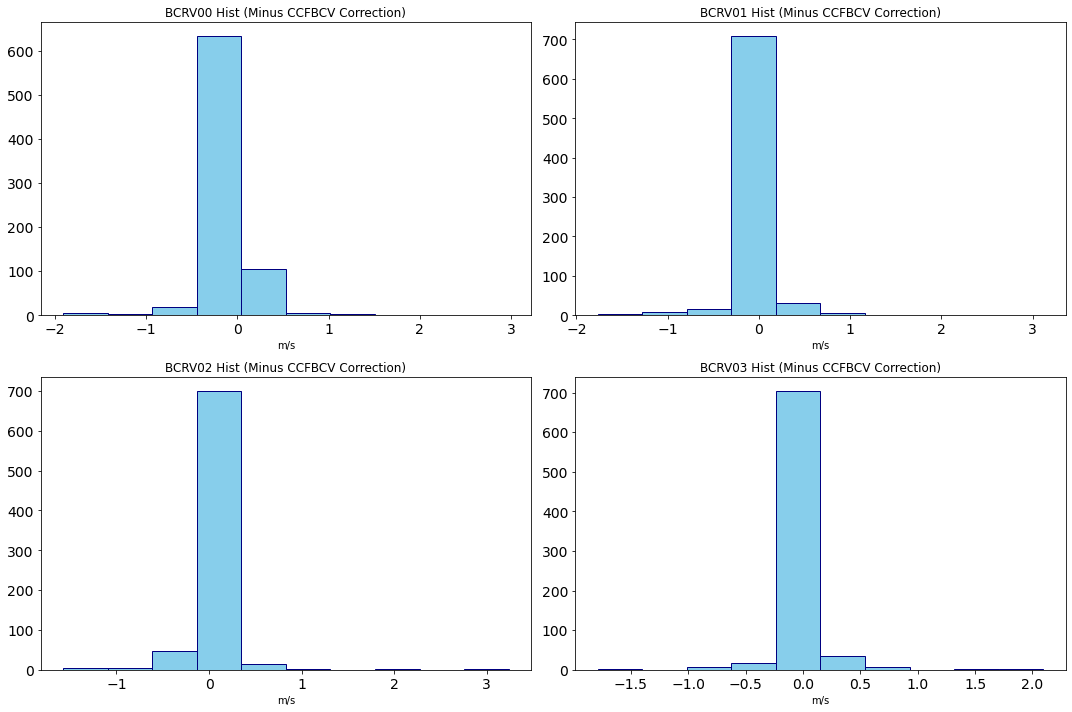

In [8]:
BCRV0.loc[:, 'BCRV0_Corr'] = BCRV0['BCRV00'] - (BCRV0['CCFBCV'].astype(float)*1000)
BCRV1.loc[:, 'BCRV1_Corr'] = BCRV1['BCRV01'] - (BCRV1['CCFBCV'].astype(float)*1000)
BCRV2.loc[:, 'BCRV2_Corr'] = BCRV2['BCRV02'] - (BCRV2['CCFBCV'].astype(float)*1000)
BCRV3.loc[:, 'BCRV3_Corr'] = BCRV3['BCRV03'] - (BCRV3['CCFBCV'].astype(float)*1000)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0][0].hist(BCRV0['BCRV0_Corr'], bins=10, color='skyblue', edgecolor='navy')
axes[0][0].set_title('BCRV00 Hist (Minus CCFBCV Correction)')
axes[0][0].set_xlabel('m/s')
axes[0][0].tick_params(axis='x', labelsize=14)
axes[0][0].tick_params(axis='y', labelsize=14)

axes[0][1].hist(BCRV1['BCRV1_Corr'], bins=10, color='skyblue', edgecolor='navy')
axes[0][1].set_title('BCRV01 Hist (Minus CCFBCV Correction)')
axes[0][1].set_xlabel('m/s')
axes[0][1].tick_params(axis='x', labelsize=14)
axes[0][1].tick_params(axis='y', labelsize=14)

axes[1][0].hist(BCRV2['BCRV2_Corr'], bins=10, color='skyblue', edgecolor='navy')
axes[1][0].set_title('BCRV02 Hist (Minus CCFBCV Correction)')
axes[1][0].set_xlabel('m/s')
axes[1][0].tick_params(axis='x', labelsize=14)
axes[1][0].tick_params(axis='y', labelsize=14)

axes[1][1].hist(BCRV3['BCRV3_Corr'], bins=10, color='skyblue', edgecolor='navy')
axes[1][1].set_title('BCRV03 Hist (Minus CCFBCV Correction)')
axes[1][1].set_xlabel('m/s')
axes[1][1].tick_params(axis='x', labelsize=14)
axes[1][1].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

In [9]:
BCRV0.loc[:, 'CCFBJ0_Corr'] = (BCRV0['CCFBJD00'].astype(float) - BCRV0['CCFBJD'].astype(float)) * 86400
BCRV1.loc[:, 'CCFBJ1_Corr'] = (BCRV1['CCFBJD01'].astype(float) - BCRV1['CCFBJD'].astype(float)) * 86400
BCRV2.loc[:, 'CCFBJ2_Corr'] = (BCRV2['CCFBJD02'].astype(float) - BCRV2['CCFBJD'].astype(float)) * 86400
BCRV3.loc[:, 'CCFBJ3_Corr'] = (BCRV3['CCFBJD03'].astype(float) - BCRV3['CCFBJD'].astype(float)) * 86400

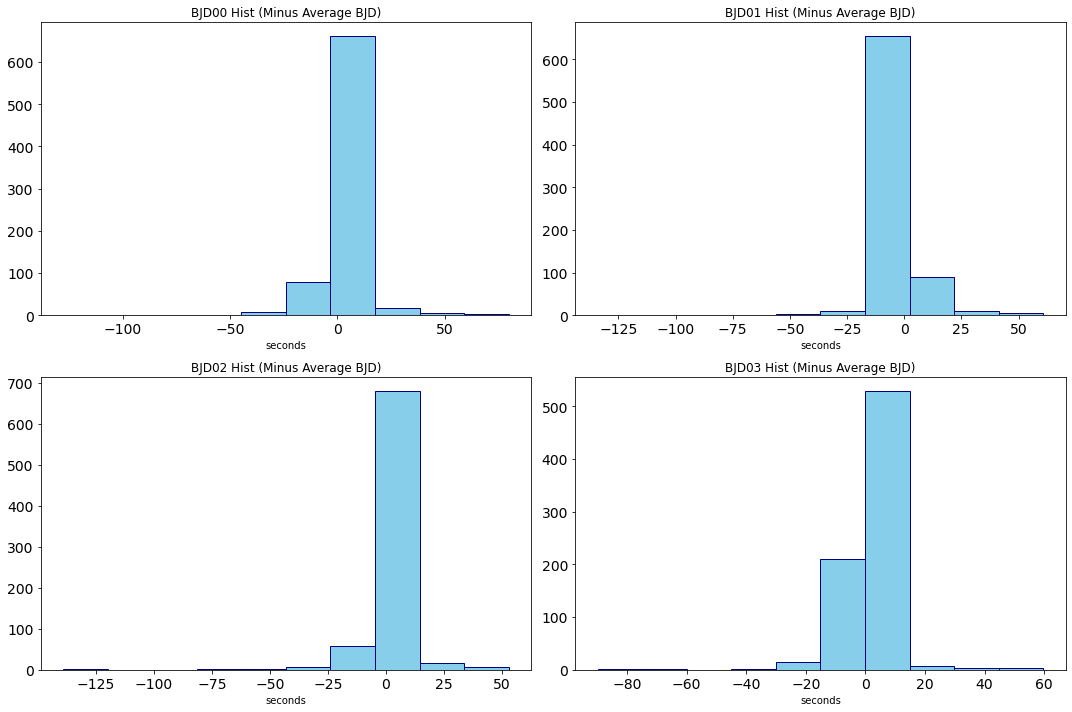

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0][0].hist(BCRV0['CCFBJ0_Corr'], bins=10, color='skyblue', edgecolor='navy')
axes[0][0].set_title('BJD00 Hist (Minus Average BJD)')
axes[0][0].set_xlabel('seconds')
axes[0][0].tick_params(axis='x', labelsize=14)
axes[0][0].tick_params(axis='y', labelsize=14)

axes[0][1].hist(BCRV1['CCFBJ1_Corr'], bins=10, color='skyblue', edgecolor='navy')
axes[0][1].set_title('BJD01 Hist (Minus Average BJD)')
axes[0][1].set_xlabel('seconds')
axes[0][1].tick_params(axis='x', labelsize=14)
axes[0][1].tick_params(axis='y', labelsize=14)

axes[1][0].hist(BCRV2['CCFBJ2_Corr'], bins=10, color='skyblue', edgecolor='navy')
axes[1][0].set_title('BJD02 Hist (Minus Average BJD)')
axes[1][0].set_xlabel('seconds')
axes[1][0].tick_params(axis='x', labelsize=14)
axes[1][0].tick_params(axis='y', labelsize=14)

axes[1][1].hist(BCRV3['CCFBJ3_Corr'], bins=10, color='skyblue', edgecolor='navy')
axes[1][1].set_title('BJD03 Hist (Minus Average BJD)')
axes[1][1].set_xlabel('seconds')
axes[1][1].tick_params(axis='x', labelsize=14)
axes[1][1].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

In [11]:
BJ0SortHigh = BCRV0.sort_values(by='CCFBJ0_Corr', ascending=False)
BJ0SortHigh[['CCFBJ0_Corr', 'L0_filename']].head()

,CCFBJ0_Corr,L0_filename
242,79.897535,KP.20241013.22429.64.fits
778,64.218038,KP.20241026.52204.35.fits
245,58.459590,KP.20241013.26121.53.fits
529,51.520340,KP.20241021.32152.40.fits
347,49.067004,KP.20241016.44975.83.fits


In [12]:
BJ0SortLow = BCRV0.sort_values(by='CCFBJ0_Corr', ascending=True)
BJ0SortLow[['CCFBJ0_Corr', 'L0_filename']].head()

,CCFBJ0_Corr,L0_filename
767,-127.798623,KP.20241026.44207.71.fits
354,-57.640645,KP.20241016.55598.79.fits
145,-43.740861,KP.20241010.19607.75.fits
53,-36.671980,KP.20241003.52801.77.fits
369,-34.850304,KP.20241019.19148.99.fits


In [13]:
BCV0SortHigh = BCRV0.sort_values(by='BCRV0_Corr', ascending=False)
BCV0SortHigh[['BCRV0_Corr', 'L0_filename']].head()

,BCRV0_Corr,L0_filename
767,2.971993,KP.20241026.44207.71.fits
354,1.471229,KP.20241016.55598.79.fits
714,1.120113,KP.20241023.45999.07.fits
53,1.023038,KP.20241003.52801.77.fits
662,1.004949,KP.20241023.26379.85.fits


In [14]:
BCV0SortLow = BCRV0.sort_values(by='BCRV0_Corr', ascending=True)
BCV0SortLow[['BCRV0_Corr', 'L0_filename']].head()

,BCRV0_Corr,L0_filename
778,-1.908143,KP.20241026.52204.35.fits
245,-1.698626,KP.20241013.26121.53.fits
347,-1.571372,KP.20241016.44975.83.fits
529,-1.545002,KP.20241021.32152.40.fits
242,-1.484275,KP.20241013.22429.64.fits
